In [3]:
print("inventor del mish")

inventor del mish


In [4]:
import matplotlib.pyplot as plt
import numpy as np

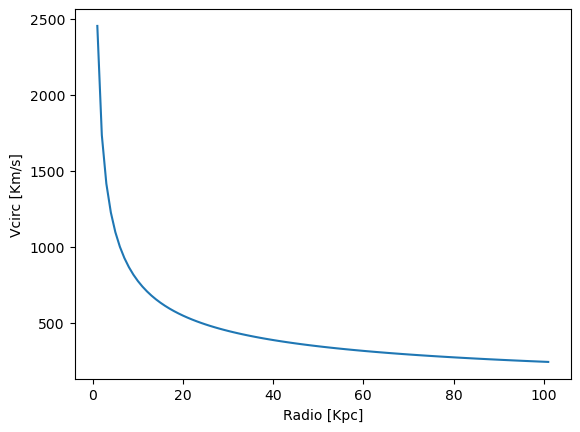

In [34]:
#2a)
M_sol = 1.989e30
Kpc = 3.086e19
G_SI = 6.672e-11 #SI
M = 1.4e12*M_sol

r = []
V = []
n = 1

for i in range(101):
    r0 = n*Kpc
    r.append(n)
    V.append(np.sqrt((G_SI*M)/r0)/1000)
    n = n+1

plt.plot(r,V)
plt.xlabel("Radio [Kpc]")
plt.ylabel("Vcirc [Km/s]")
plt.show()

6.672e-20


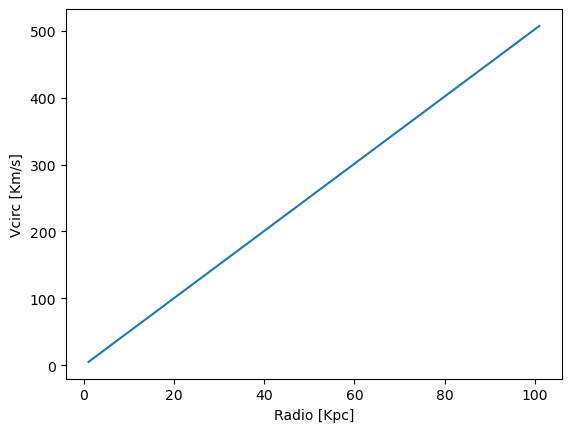

In [35]:
#2.b) Densidad
#Consideramos una densidad \rho dada por \rho = M/(4/3)pir^{3}, y lo metemos a la formula de la velocidad:
G = ((G_SI/((3.086e19)**3))/(3.1710e-14)**2)*1.989e30 #Kpc**3/(Myr**2*M_sol)
G_Km = G_SI/((1000)**3) #Km**3/(s**2*Kg)
print(G_Km)
def V_dens(r):
    V = r*np.sqrt(4*G_Km*rho*np.pi/3)
    return(V)
    
rho = (1.4e12*M_sol)/((100*3.086e16)**3) #Kg/Km**3
a=1
r = []
V = []
for i in range(101):
    r0 = a*3.086e16
    r.append(a)
    V.append(V_dens(r0))
    a = a+1

plt.plot(r,V)
plt.xlabel("Radio [Kpc]")
plt.ylabel("Vcirc [Km/s]")
plt.show()

8.55935540323196e-27
220.03869230969673


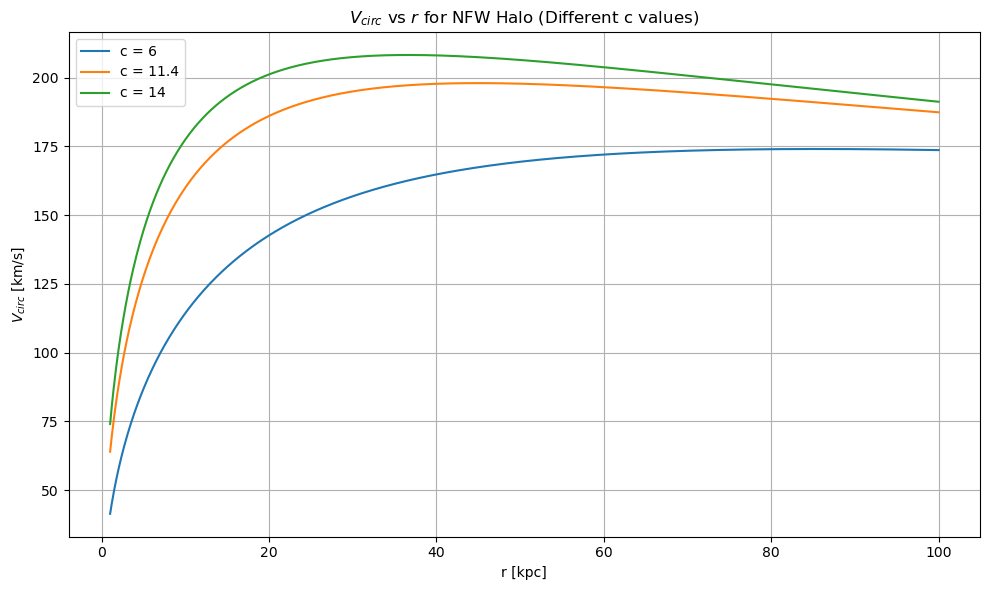

In [86]:
# dark_matter halo
G_SI = 6.672e-11 #[N*m^2/s²]
G = G_SI/((3.086e19)**3)/(3.1710e-14)**2 #Kpc**3/s**2
M = 1.4e12
    
#/////////////////////

#parte C

H_0=67.5 #km*s^-1*Mpc^-1. Debemos dejar la expresion en (s^-1), por lo que multilicamos por 1 mpc/3.086*10^19 km para elimiar las unidades
H_0_SI= H_0 *(1/(3.086*10**19))


#ahora obteniendo Rho_crit con las unidades correctas
rho_crit=(3*(H_0_SI**2))/(8*np.pi*G_SI) #kg/m^3
print(rho_crit)

#//////////////////////////////////

#En la segunda parte, buscamos el valor de r_vir

M_vir=1.4e12 #en masas solares, queremos pasarlo a kg
M_vir_kg=M_vir*(1.989*10**30)

r_vir = np.cbrt((3*M_vir_kg)/(4*np.pi*200*rho_crit)) #en metros

#pasandolo a kiloparsec
r_vir_kp=r_vir*(3.016*10**-20) #Kpc
print(r_vir_kp)


#////////////////////////////////////


#Para la tercera parte nos piden plotear la velocidad circular respecto a r
# Constants
G = 4.302e-6  # Gravitational constant in (kpc * km^2) / (Msun * s^2)

# Given values
M_vir = 1.4e12  # virial mass in solar masses
c_values = [6, 11.4 ,14]  # concentration parameters for cluster and galaxy halos
r = np.linspace(1, 100, 1000)  # radius in kpc

def g(c):
    return 1 / (np.log(1 + c) - c / (1 + c))

def M_enclosed(r, r_vir, M_vir, c):
    s = r / r_vir
    g_c = g(c)
    return g_c * M_vir * (np.log(1 + c * s) - (c * s) / (1 + c * s))

def v_circ(r, M_r):
    return np.sqrt(G * M_r / r)  # km/s

# Calculate r_vir from M_vir using equation (4)
rho_crit = 8.51e-27  # kg/m^3
rho_crit_Msun_kpc3 = rho_crit * (1.989e30) / (3.086e19)**3  # convert to Msun/kpc^3

Msun_to_kg = 1.989e30
kpc_to_m = 3.086e19
rho_crit_Msun_kpc3 = rho_crit / Msun_to_kg * (kpc_to_m**3)
r_vir = ((3 * M_vir) / (4 * np.pi * 200 * rho_crit_Msun_kpc3))**(1/3)


# Compute V_circ for both concentration parameters
plt.figure(figsize=(10, 6))
for c in c_values:
    M_r = M_enclosed(r, r_vir, M_vir, c)
    V = v_circ(r, M_r)
    plt.plot(r, V, label=f'c = {c}')

plt.xlabel('r [Kpc]')
plt.ylabel(r'$V_{circ}$ [Km/s]')
plt.title(r'$V_{circ}$ vs $r$ for NFW Halo (Different c values)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

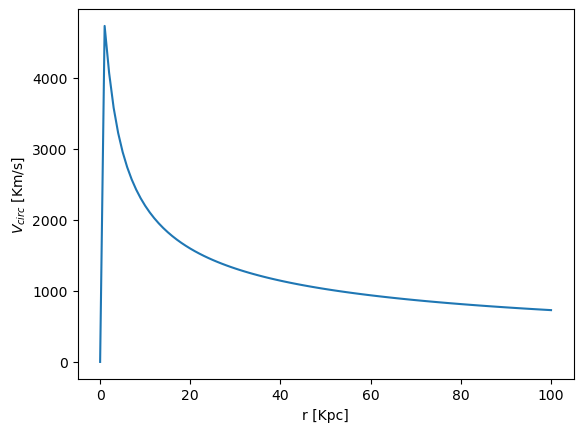

In [183]:
#3) bulge
a = 0.55*Kpc #m
V = []
n = 0
radio = []
M = 1.25e10*M_sol #Msolares
for i in range(101):
  r0 = n*Kpc
  radio.append(n)
  V.append(np.sqrt((r0*G_SI*M)/((r0 + a)**2))/1000)
  n = n + 1

plt.plot(radio, V)
plt.xlabel('r [Kpc]')
plt.ylabel('$V_{circ}$ [Km/s]')
plt.show()

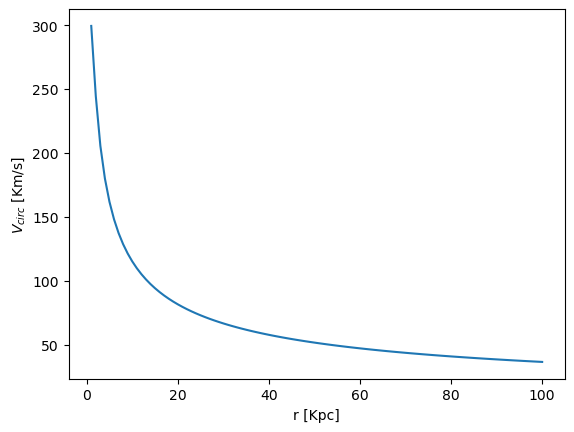

In [182]:
#4 b)
G = 6.67e-11 #[Nm^2/kg^2]
G_km = G/(1000**3) #[km^mass of the disk of milky way3/s^2*kg]
M = 3.1e10*1.989e30 #[kg]
a = 0.55 #[kpc]
a_km = a*3.086e16 #[km]

#en km
Vcirc = []
r0 = []
b = 1
mish = 3/2
for i in range(100):
  ro = b*3.086e16
  Vcirc.append(np.sqrt((G_km*M*ro**2)/((ro**2 + a_km**2)**mish)))
  r0.append(b)
  b = b + 1

plt.plot(r0,Vcirc)
plt.xlabel('r [Kpc]')
plt.ylabel('$V_{circ}$ [Km/s]')
plt.show()

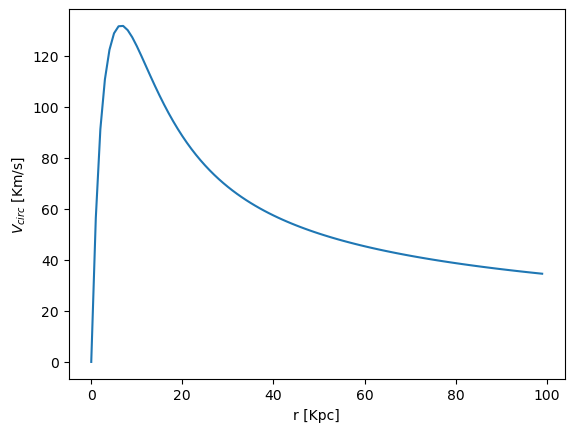

In [180]:
#4c) valores stellar halo

Mexp = 3.1e10 #[kg]
Rexp = 3 #[km]

#calculando cada uno de los coeficientes

M1 = Mexp*1.9487* 1.989e30
M2 = Mexp*(-1.3077)* 1.989e30
M3 = Mexp*0.2242*1.989e30
a1 = Rexp*2.0074*3.086e16
a2 = Rexp*4.4441*3.086e16
a3 = Rexp*0.7333*3.086e16
V = []
r0_m = []
c = 0
mish = 3/2
for i in range(100):
  r1 = c*3.086e16
  p1 = (G_km*M1*(r1**2))/((r1**2 + a1**2)**mish)
  p2 = (G_km*M2*(r1**2))/((r1**2 + a2**2)**mish)
  p3 = (G_km*M3*(r1**2))/((r1**2 + a3**2)**mish)
  v = np.sqrt((p1+p2+p3))
  V.append(v)
  r0_m.append(c)
  c = c + 1

plt.plot(r0_m,V)
plt.xlabel('r [Kpc]')
plt.ylabel('$V_{circ}$ [Km/s]')
plt.show()

[0.19, 0.36, 0.65, 1.62, 2.61, 3.55, 4.52, 5.54, 6.47, 7.55, 8.43, 9.47, 10.52, 11.39, 12.4, 13.46, 14.52, 15.81, 19.78, 26.27, 28.27, 29.48, 31.55, 33.75, 36.5, 38.4, 40.42, 42.42, 44.48, 45.97, 48.03, 49.95, 51.78, 53.91, 56.86, 57.96, 60.89, 64.73, 69.4, 72.99, 77.09, 81.7, 85.21, 88.94, 89.5, 92.27, 97.15, 100.48, 106.55, 119.93, 189.45, 0.2, 0.38, 0.66, 1.61, 2.57, 3.59, 4.51, 5.53, 6.5, 7.56, 8.34, 9.45, 10.5, 11.44, 12.51, 13.53, 14.59, 16.05, 18.64, 26.3, 28.26, 29.51, 32.04, 33.99, 36.49, 38.41, 40.42, 42.4, 44.49, 45.99, 48.06, 49.49, 51.39, 53.89, 56.89, 57.98, 60.92, 64.73, 69.31, 72.96, 76.95, 81.13, 84.9, 89.35, 92.44, 97.41, 100.72, 106.77, 119.98, 189.49, 0.19, 0.35, 0.63, 1.63, 2.56, 3.52, 4.52, 5.58, 6.55, 7.57, 8.42, 9.5, 10.46, 11.42, 12.51, 13.36, 14.44, 16.19, 19.14, 26.3, 28.27, 29.51, 32.02, 34.01, 35.99, 38.08, 40.45, 42.43, 44.49, 45.99, 48.05, 49.53, 51.93, 54.38, 56.94, 57.99, 60.93, 64.7, 69.27, 73.03, 77.01, 81.23, 85.04, 89.44, 92.56, 97.58, 100.87, 106.9

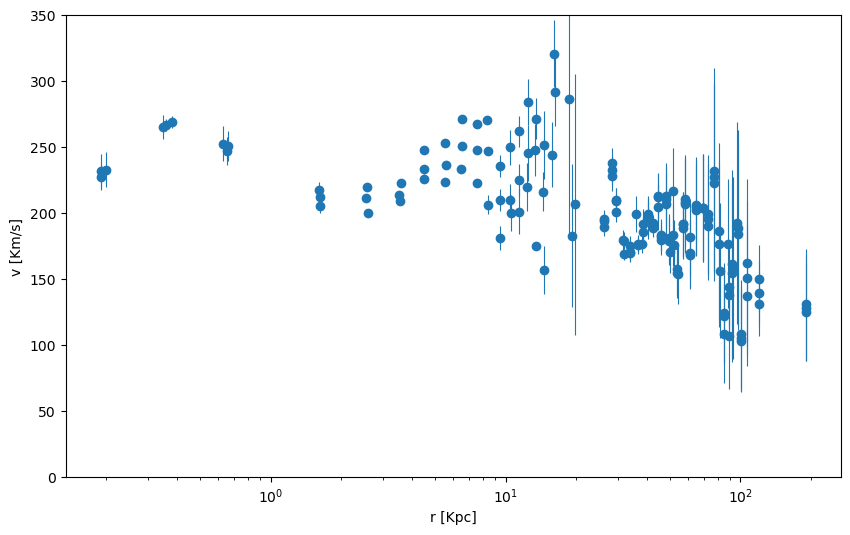

In [5]:
#5)
PATH = '/home/luzi/Extra/'
with open(PATH + 'MW_Vcirc_forcourse.dat', 'r') as data:
    lineas = [linea.split() for linea in data]

r_r = []
v_r = []
e_r = []
a = 0
for linea in lineas:
    if a == 0:
        a += 1
    else:
        r_r.append((float(linea[0])))
        v_r.append(float(linea[1]))
        e_r.append(float(linea[2]))
print(r_r)
plt.figure(figsize=(10,6))
plt.scatter(r_r, v_r, s=5)
plt.ylim(0,350)
plt.xscale('log')
plt.errorbar(r_r, v_r, yerr = e_r, fmt = 'o', elinewidth=0.8)
plt.xlabel("r [Kpc]")
plt.ylabel("v [Km/s]")
plt.show()

8.55935540323196e-27
220.03869230969673


/tmp/ipykernel_83484/2100669083.py:53: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(G * M_r / r)  # km/s


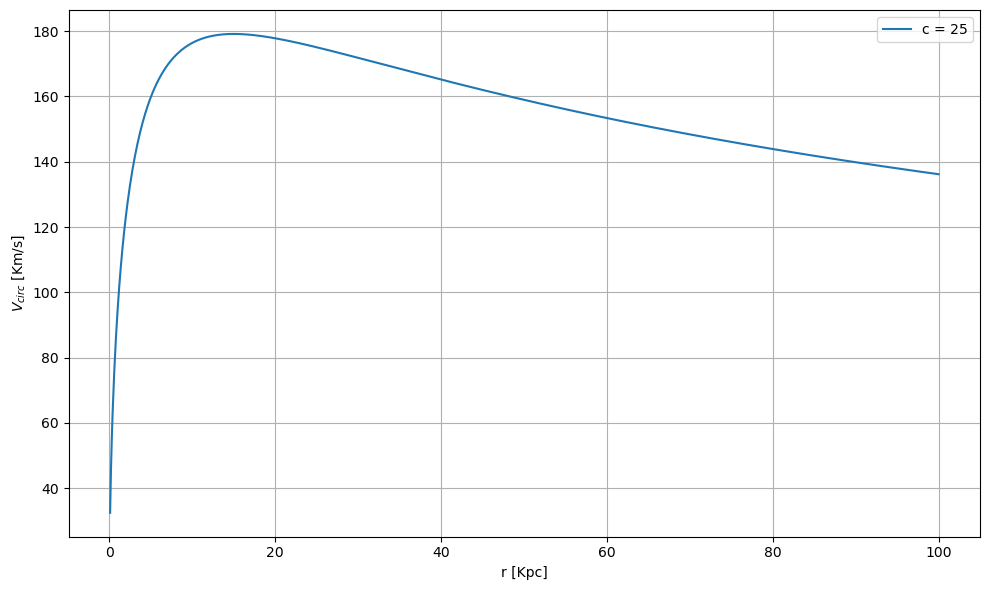

In [175]:
# DARK MATTER 5
G_SI = 6.672e-11 #[N*m^2/s²]
G = G_SI/((3.086e19)**3)/(3.1710e-14)**2 #Kpc**3/s**2
M = 5.5e11
    
#/////////////////////

#parte C

H_0=67.5 #km*s^-1*Mpc^-1. Debemos dejar la expresion en (s^-1), por lo que multilicamos por 1 mpc/3.086*10^19 km para elimiar las unidades
H_0_SI= H_0 *(1/(3.086*10**19))


#ahora obteniendo Rho_crit con las unidades correctas
rho_crit=(3*(H_0_SI**2))/(8*np.pi*G_SI) #kg/m^3
print(rho_crit)

#//////////////////////////////////

#En la segunda parte, buscamos el valor de r_vir

M_vir=1.4e12 #en masas solares, queremos pasarlo a kg
M_vir_kg=M_vir*(1.989*10**30)

r_vir = np.cbrt((3*M_vir_kg)/(4*np.pi*200*rho_crit)) #en metros

#pasandolo a kiloparsec
r_vir_kp=r_vir*(3.016*10**-20) #Kpc
print(r_vir_kp)


#////////////////////////////////////


#Para la tercera parte nos piden plotear la velocidad circular respecto a r
# Constants
G = 4.302e-6  # Gravitational constant in (kpc * km^2) / (Msun * s^2)

# Given values
M_vir = 5.5e11  # virial mass in solar masses
c_values = [6, 11.4 ,14]  # concentration parameters for cluster and galaxy halos
r = np.linspace(0, 100, 1000)  # radius in kpc

def g(c):
    return 1 / (np.log(1 + c) - c / (1 + c))

def M_enclosed(r, r_vir, M_vir, c):
    s = r / r_vir
    g_c = g(c)
    return g_c * M_vir * (np.log(1 + c * s) - (c * s) / (1 + c * s))

def v_circ(r, M_r):
    return np.sqrt(G * M_r / r)  # km/s

# Calculate r_vir from M_vir using equation (4)
rho_crit = 8.51e-27  # kg/m^3
rho_crit_Msun_kpc3 = rho_crit * (1.989e30) / (3.086e19)**3  # convert to Msun/kpc^3

Msun_to_kg = 1.989e30
kpc_to_m = 3.086e19
rho_crit_Msun_kpc3 = rho_crit / Msun_to_kg * (kpc_to_m**3)
r_vir = ((3 * M_vir) / (4 * np.pi * 200 * rho_crit_Msun_kpc3))**(1/3)


# Compute V_circ for both concentration parameters
plt.figure(figsize=(10, 6))
c = 25
M_r = M_enclosed(r, r_vir, M_vir, c)
v_h = v_circ(r, M_r)
plt.plot(r, v_h, label=f'c = {c}')
plt.xlabel('r [Kpc]')
plt.ylabel(r'$V_{circ}$ [Km/s]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

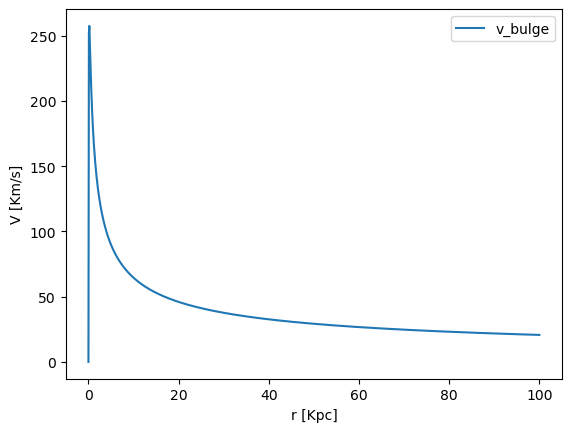

In [171]:
#BULGE 5
r = np.linspace(0, 100, 1000) 
M_sol = 1.989e30
Kpc = 3.086e19
a = 0.16*Kpc #m
v_b = []
n = 0
radio = []
M = 1e10*M_sol #Msolares
for n in r:
    r0 = n*Kpc
    radio.append(n)
    m_enclosed = M*((r0)**(2))/((r0)**2+a**2)
    v_b.append(np.sqrt((r0*G_SI*M)/((r0 + a)**2))/1000)
    n = n + 1

plt.plot(radio, v_b, label = "v_bulge")
plt.xlabel('r [Kpc]')
plt.ylabel('V [Km/s]')
plt.legend()
plt.show()

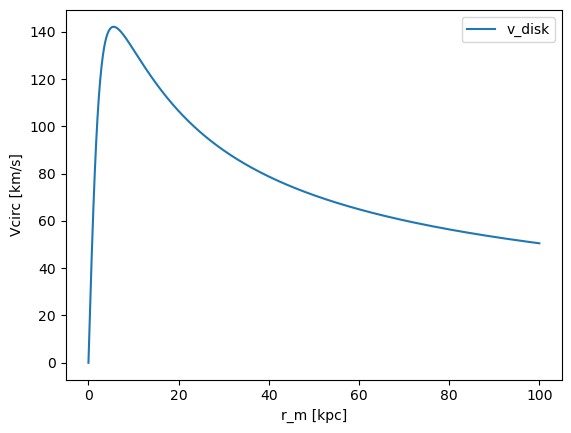

In [172]:
r_disk = 25 #kpc
r = np.linspace(0, 100, 1000) 
Kg = 1.989e30
Kpc = 3.086e16
G = 6.67e-11 #[Nm^2/kg^2]
G_km = G/(1000**3) #[km^mass of the disk of milky way3/s^2*kg]
#thin disk

M1_thin = 2.106e10*Kg #Kg
M2_thin = 2.162e10*Kg
M3_thin = 1.704e10*Kg
a1_thin = 3.859*Kpc
a2_thin = 9.052*Kpc
a3_thin = 3.107*Kpc
b_thin = 0.243*Kpc
v_thin = []
r_thin = []
mish = 3/2
for n in r:
  r1 = n*3.086e16
  p1 = (G_km*M1_thin*(r1**2))/((r1**2 + (a1_thin)**2)**mish)
  p2 = (G_km*M2_thin*(r1**2))/((r1**2 + (a2_thin)**2)**mish)
  p3 = (G_km*M3_thin*(r1**2))/((r1**2 + (a3_thin)**2)**mish)
  v = np.sqrt((p1+p2+p3)) #Hay valores desde los 3.3 Kpc
  v_thin.append(v)
  r_thin.append(n)

#thick disk
M1_thick = 0.056*Kg #Kg
M2_thick = 3.766*Kg
M3_thick = 3.250*Kg
a1_thick = 0.993*Kpc
a2_thick = 6.555*Kpc
a3_thick = 7.651*Kpc
b_thick = 0.776*Kpc
v_thick = []
r_thick = []
mish = 3/2
for n in r:
  r1 = n*3.086e16
  p1 = (G_km*M1_thick*(r1**2))/((r1**2 + (a1_thick)**2)**mish)
  p2 = (G_km*M2_thick*(r1**2))/((r1**2 + (a2_thick)**2)**mish)
  p3 = (G_km*M3_thick*(r1**2))/((r1**2 + (a3_thick)**2)**mish)
  v = np.sqrt((p1+p2+p3))
  v_thick.append(v)
  r_thick.append(n)

#H1 disk
M1_H1 = 2.046*Kg #Kg
M2_H1 = 2.169*Kg
M3_H1 = 3.049*Kg
a1_H1 = 9.021*Kpc
a2_H1 = 9.143*Kpc
a3_H1 = 7.758*Kpc
b_H1 = 0.168*Kpc
v_H1 = []
r_H1 = []
mish = 3/2
for n in r:
  r1 = n*3.086e16
  p1 = (G_km*M1_H1*(r1**2))/((r1**2 + (a1_H1)**2)**mish)
  p2 = (G_km*M2_H1*(r1**2))/((r1**2 + (a2_H1)**2)**mish)
  p3 = (G_km*M3_H1*(r1**2))/((r1**2 + (a3_H1)**2)**mish)
  v = np.sqrt((p1+p2+p3))
  v_H1.append(v)
  r_H1.append(n)

#H2 disk
M1_H2 = 0.928*Kg #Kg
M2_H2 = 0.163*Kg
M3_H2 = 0.837*Kg
a1_H2 = 6.062*Kpc
a2_H2 = 3.141*Kpc
a3_H2 = 4.485*Kpc
b_H2 = 0.128*Kpc
v_H2 = []
r_H2 = []
mish = 3/2
for n in r:
  r1 = n*3.086e16
  p1 = (G_km*M1_H2*(r1**2))/((r1**2 + (a1_H2)**2)**mish)
  p2 = (G_km*M2_H2*(r1**2))/((r1**2 + (a2_H2)**2)**mish)
  p3 = (G_km*M3_H2*(r1**2))/((r1**2 + (a3_H2)**2)**mish)
  v = np.sqrt((p1+p2+p3))
  v_H2.append(v)
  r_H2.append(n)

v_disk = []
for i in range(1000):
    vel = np.sqrt(v_thin[i]**2+v_thick[i]**2+v_H1[i]**2+v_H2[i]**2)
    v_disk.append(vel) 
plt.plot(r_H2,v_disk, label="v_disk")
plt.xlabel('r_m [kpc]')
plt.ylabel('Vcirc [km/s]')
plt.legend()
plt.show()

/tmp/ipykernel_83484/509888213.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  v_sh.append(np.sqrt((G_km*M_sh)/r0))


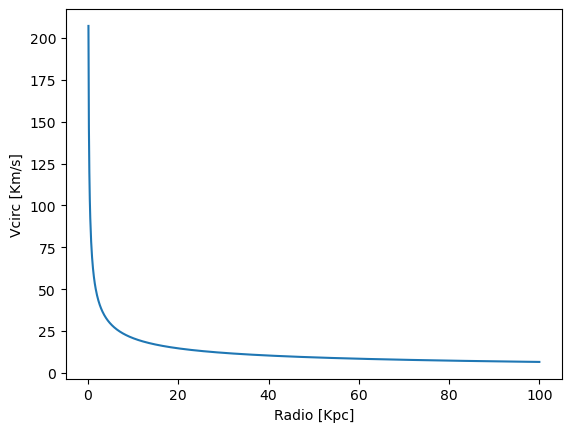

In [173]:
#Stellar halo (kepler?)
M_sh = 0.1e10*Kg
G_SI = 6.672e-11 #SI

r = np.linspace(0, 100, 1000) 
r_sh = []
v_sh = []

for i in r:
    r0 = i*Kpc
    r_sh.append(i)
    v_sh.append(np.sqrt((G_km*M_sh)/r0))

plt.plot(r,v_sh)
plt.xlabel("Radio [Kpc]")
plt.ylabel("Vcirc [Km/s]")
plt.show()

/tmp/ipykernel_83484/789260051.py:21: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,100)


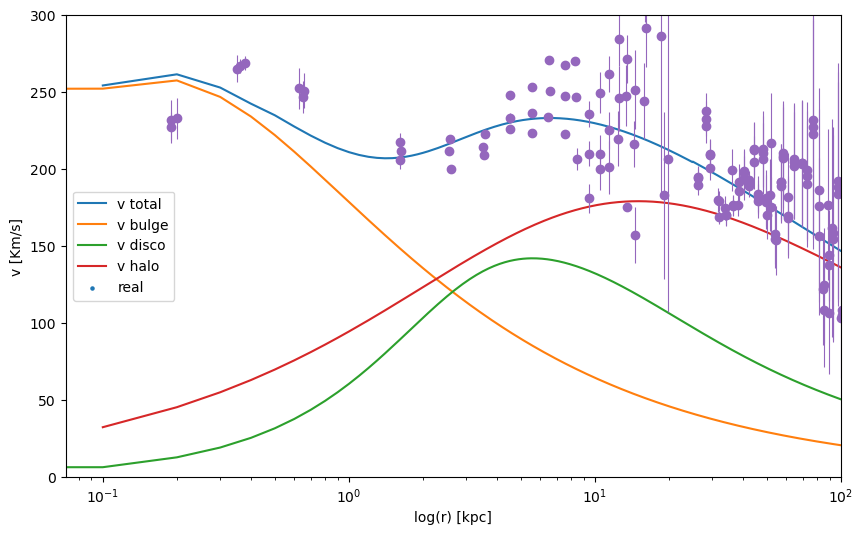

In [174]:
#v_h, v_b, v_disk y v_sh
v_tot = []
r_bulge = 0.5
r_disk = 25 #kpc
r_stellar = 50 #kpc

for i in range(1000):
    if r[i] < r_bulge:
        v_tot.append(np.sqrt(v_h[i]**2+v_b[i]**2))
    if r_bulge <= r[i] <= r_disk:
         v_tot.append(np.sqrt(v_h[i]**2+v_b[i]**2+v_disk[i]**2))
    if r_disk <= r[i]:
        v_tot.append(np.sqrt(v_h[i]**2+v_disk[i]**2+v_b[i]**2+v_sh[i]**2))

plt.figure(figsize=(10,6))
plt.plot(r,v_tot,label = "v total")
plt.plot(r,v_b, label = "v bulge")
plt.plot(r,v_disk, label = "v disco")
plt.plot(r,v_h, label = "v halo")
plt.xscale('log')
plt.xlim(0,100)
plt.ylim(0,300)
plt.scatter(r_r, v_r, s=5, label = "real")
plt.xscale('log')
plt.errorbar(r_r, v_r, yerr = e_r, fmt = 'o', elinewidth=0.8)
plt.xlabel("log(r) [kpc]")
plt.ylabel("v [Km/s]")

plt.legend()
plt.show()